In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv


In [2]:
df= pd.read_csv("/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# checking for the missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# checking for duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
#convert target variable into the binary

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
# Removing unwanted column

if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

Understanding of data:

Data has 32 columns 
1. unamed: 32 and id column are not required as they do not help in prediction
2. There are three type of value of each feature : Mean, se, worst
   Mean: Average value of the feature
   se: standard error is a measure of variability or uncertainty around the mean value
   worst: measures the largest value of that feature amongst all the values

**Exploratory Data Analysis**

**Count plot to check the class distribution**

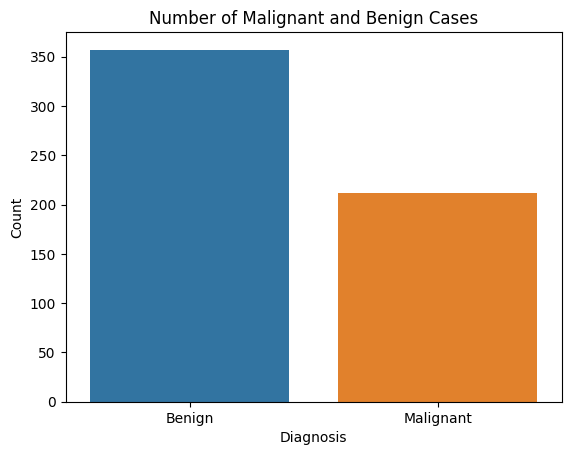

In [11]:

sns.countplot(data=df, x='diagnosis')
plt.title('Number of Malignant and Benign Cases')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign','Malignant'])
plt.show()

Currently we will check the correlation between the mean, se and worst columns

In [12]:
# isolate mean, se and worst feature column
# Pick columns ending with _mean, _se, or _worst
mean_cols = [col for col in df.columns if col.endswith('_mean')]
se_cols = [col for col in df.columns if col.endswith('_se')]
worst_cols = [col for col in df.columns if col.endswith('_worst')]


In [13]:
for m, s in zip(mean_cols, se_cols):
    corr = df[m].corr(df[s])
    print(f"Correlation between {m} and {s}: {corr:.2f}")


Correlation between radius_mean and radius_se: 0.68
Correlation between texture_mean and texture_se: 0.39
Correlation between perimeter_mean and perimeter_se: 0.69
Correlation between area_mean and area_se: 0.80
Correlation between smoothness_mean and smoothness_se: 0.33
Correlation between compactness_mean and compactness_se: 0.74
Correlation between concavity_mean and concavity_se: 0.69
Correlation between concave points_mean and concave points_se: 0.62
Correlation between symmetry_mean and symmetry_se: 0.45
Correlation between fractal_dimension_mean and fractal_dimension_se: 0.69


In [14]:
for m, w in zip(mean_cols, worst_cols):
    corr = df[m].corr(df[w])
    print(f"Correlation between {m} and {w}: {corr:.2f}")


Correlation between radius_mean and radius_worst: 0.97
Correlation between texture_mean and texture_worst: 0.91
Correlation between perimeter_mean and perimeter_worst: 0.97
Correlation between area_mean and area_worst: 0.96
Correlation between smoothness_mean and smoothness_worst: 0.81
Correlation between compactness_mean and compactness_worst: 0.87
Correlation between concavity_mean and concavity_worst: 0.88
Correlation between concave points_mean and concave points_worst: 0.91
Correlation between symmetry_mean and symmetry_worst: 0.70
Correlation between fractal_dimension_mean and fractal_dimension_worst: 0.77


Heatmap to visualize correlation between all features

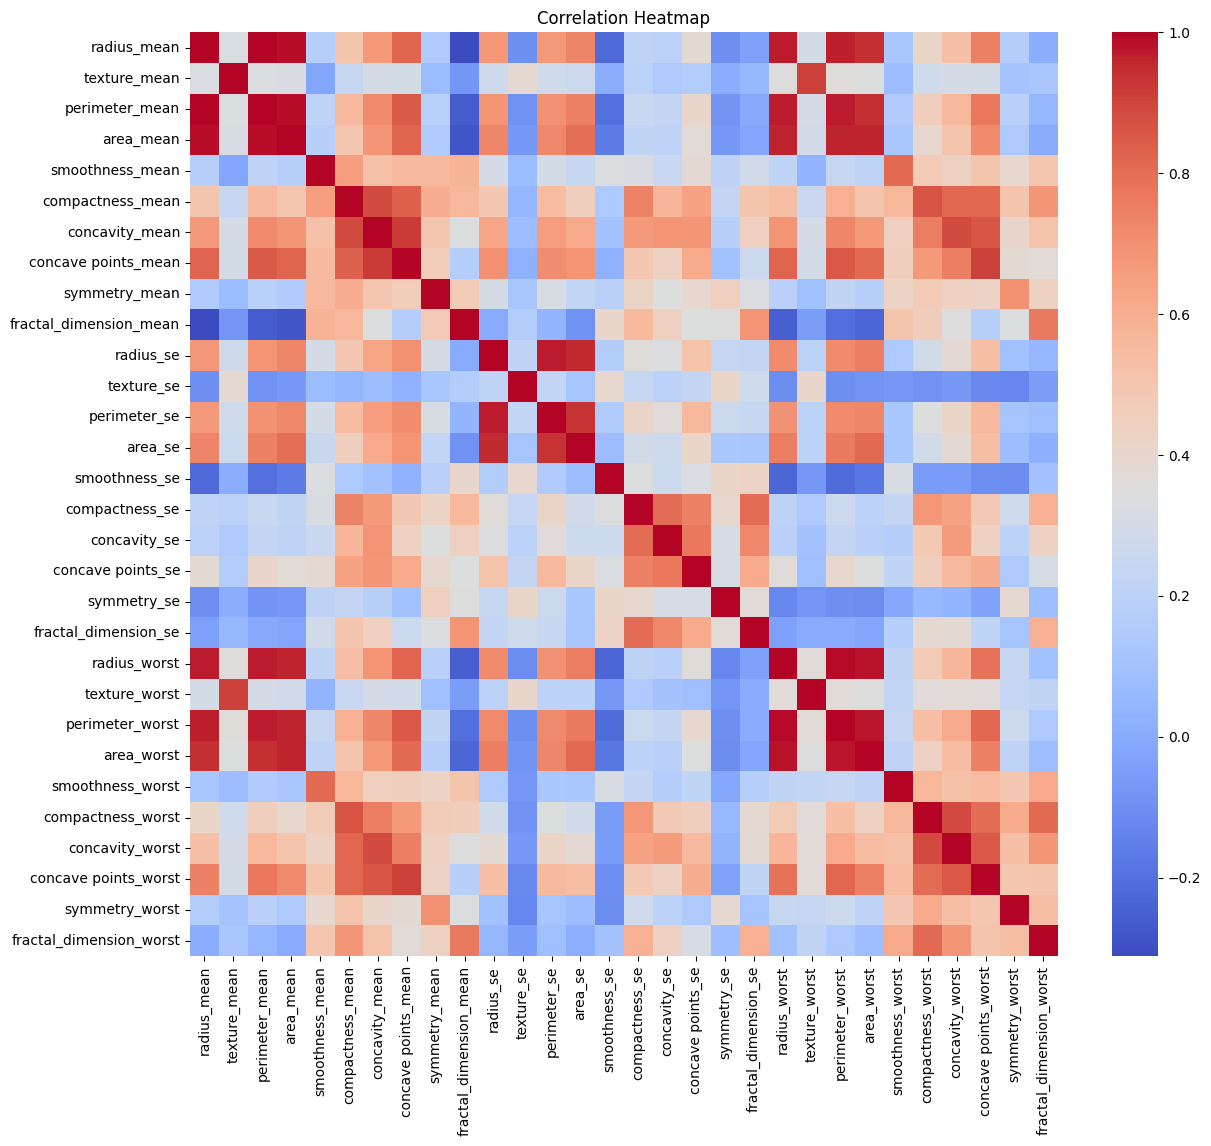

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = mean_cols + se_cols + worst_cols
corr_matrix = df[selected_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



The correlation between mean and worst columns are very high, thus we can drop worst columns
We can use  Variance Inflation Factor to calculate multicolinearity between mean and se columns 

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# check VIF for mean and se columns:
from sklearn.preprocessing import StandardScaler

X = df[mean_cols + se_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

for col, val in zip(mean_cols + se_cols, vif):
    print(f'VIF for {col}: {val:.2f}')


VIF for radius_mean: 2601.73
VIF for texture_mean: 1.61
VIF for perimeter_mean: 2946.55
VIF for area_mean: 117.06
VIF for smoothness_mean: 4.07
VIF for compactness_mean: 35.78
VIF for concavity_mean: 44.57
VIF for concave points_mean: 40.07
VIF for symmetry_mean: 2.17
VIF for fractal_dimension_mean: 10.71
VIF for radius_se: 43.30
VIF for texture_se: 1.89
VIF for perimeter_se: 38.86
VIF for area_se: 24.38
VIF for smoothness_se: 2.14
VIF for compactness_se: 10.14
VIF for concavity_se: 13.08
VIF for concave points_se: 6.52
VIF for symmetry_se: 1.91
VIF for fractal_dimension_se: 6.48


In [17]:
# calculating corelation with the target variable
for col in mean_cols:
    print(col, df[col].corr(df['diagnosis']))


radius_mean 0.7300285113754553
texture_mean 0.4151852998452038
perimeter_mean 0.7426355297258318
area_mean 0.7089838365853887
smoothness_mean 0.3585599650859316
compactness_mean 0.5965336775082524
concavity_mean 0.6963597071719051
concave points_mean 0.7766138400204345
symmetry_mean 0.33049855426254665
fractal_dimension_mean -0.01283760269843239


### Feature Selection Rationale

I selected the following features for modeling:

- `perimeter_mean`
- `concavity_mean`
- `compactness_mean`
- `texture_mean`
- `smoothness_mean`

These features were chosen because they show the highest correlation with the target (`diagnosis`) and have minimal multicollinearity based on VIF analysis. This approach helps improve model performance while avoiding redundant information.


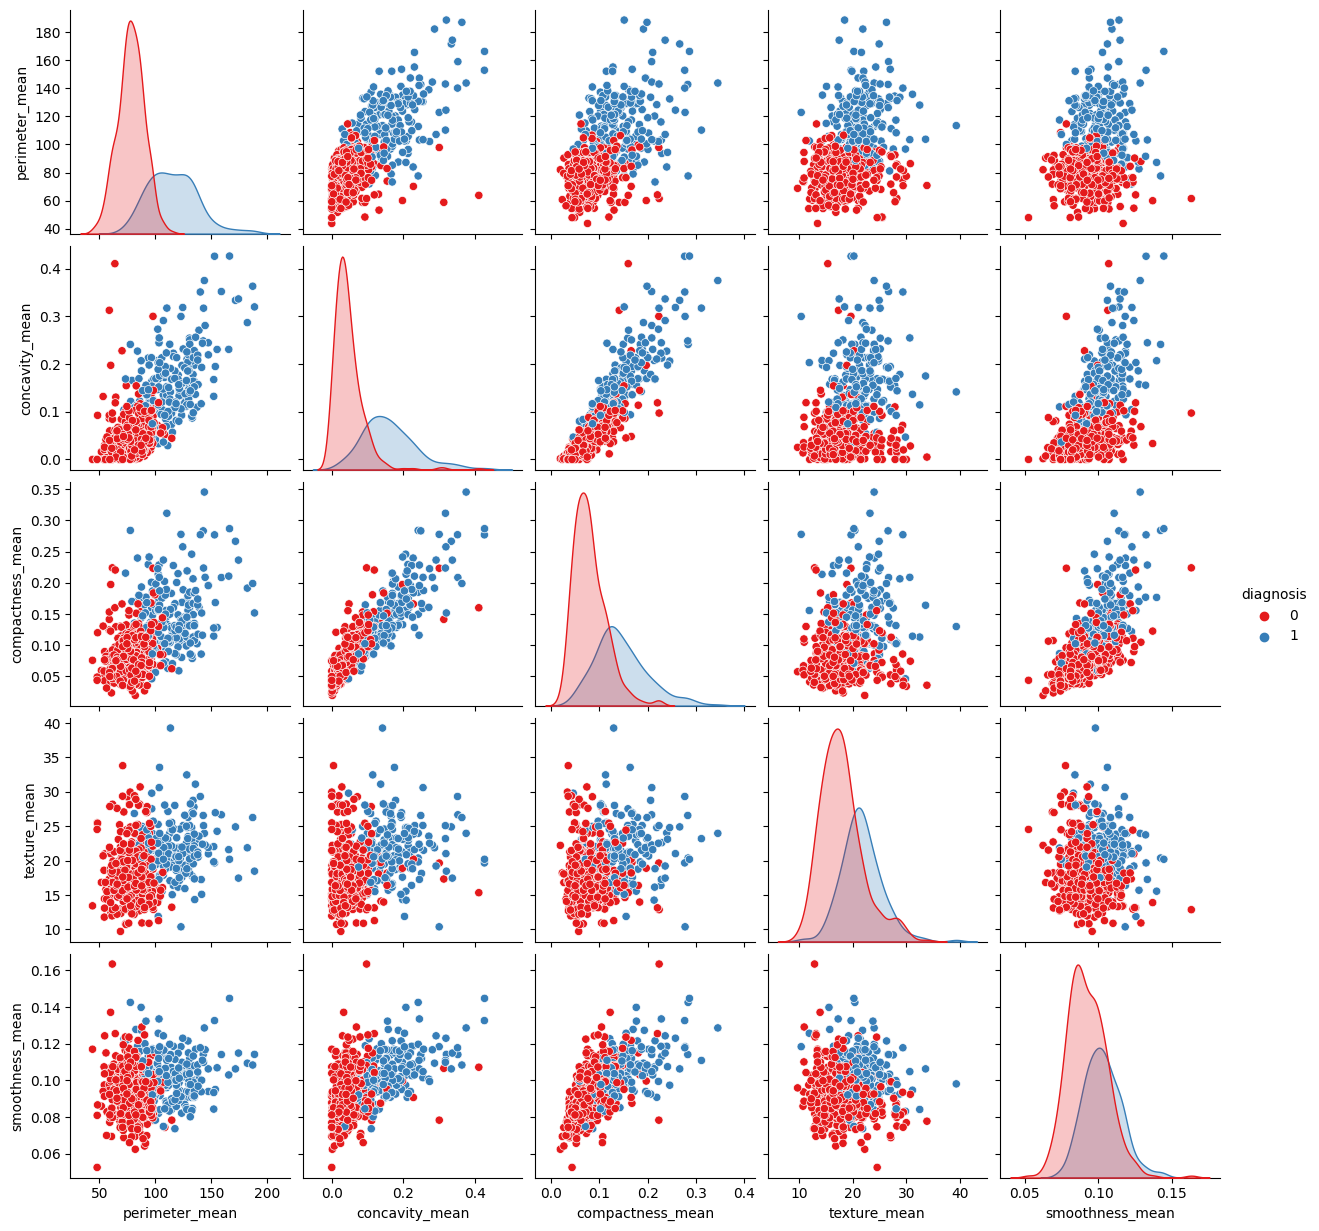

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

subset = df[['perimeter_mean', 'concavity_mean', 'compactness_mean', 'texture_mean', 'smoothness_mean', 'diagnosis']]
sns.pairplot(subset, hue='diagnosis', palette='Set1')
plt.show()


### Analysis from the pair plot
Although texture_mean and smoothness_mean show overlapping values between benign and malignant tumors when viewed individually, the pairplot reveals that the two classes still form distinct clusters when considering all selected features together. This suggests that multivariate models can leverage the combined information to distinguish between classes, even when single features do not perfectly separate them.

In [19]:
print(df['diagnosis'].isna().sum())
df['diagnosis'].dtype
df['diagnosis'].unique()
print(df['diagnosis'].value_counts())

0
diagnosis
0    357
1    212
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split

X = df[['perimeter_mean', 'concavity_mean', 'compactness_mean', 'texture_mean', 'smoothness_mean']]
y = df['diagnosis']

print(y.isna().sum())  # Should be 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.isna().sum(), y_test.isna().sum())  


0
0 0


In [21]:
print(X.isna().sum())


perimeter_mean      0
concavity_mean      0
compactness_mean    0
texture_mean        0
smoothness_mean     0
dtype: int64


In [22]:
print(df[df['diagnosis'].isna()])


Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


In [23]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

# Evaluate
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### TREE based model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Fit the model
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = clf_rf.predict(X_test)
y_proba_rf = clf_rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title('Random Forest Feature Importances')
plt.show()


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# Create the classifier
clf_xgb = xgb.XGBClassifier(
    n_estimators=100,
    use_label_encoder=False,  # Suppress warning for newer versions
    eval_metric='logloss',
    random_state=42
)

# Fit the model
clf_xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = clf_xgb.predict(X_test)
y_proba_xgb = clf_xgb.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))


In [ ]:
import matplotlib.pyplot as plt

xgb.plot_importance(clf_xgb, importance_type='gain', height=0.5, show_values=False)
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_xgb, X, y, cv=5, scoring='roc_auc')
print("Mean CV ROC-AUC:", scores.mean())


In [ ]:
from sklearn.model_selection import cross_val_score

# Get CV scores (here, 5 folds)
cv_scores = cross_val_score(clf_xgb, X, y, cv=5, scoring='roc_auc')
print("CV ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(cv_scores, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("XGBoost Cross-Validated ROC-AUC Scores (5-fold)")
plt.xlabel("ROC-AUC")
plt.yticks([1], ['XGBoost'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you already have y_test and y_proba_xgb from XGBoost
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Collect metrics
results = []

# Logistic Regression
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'F1': f1_score(y_test, y_pred),
    'ROC-AUC': roc_auc_score(y_test, y_proba)
})

# Random Forest
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_proba_rf)
})

# XGBoost
results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'F1': f1_score(y_test, y_pred_xgb),
    'ROC-AUC': roc_auc_score(y_test, y_proba_xgb)
})

# Create DataFrame
results_df = pd.DataFrame(results)
print(results_df)


In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba):.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})')

# Reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Model Comparison')
plt.legend(loc="lower right")
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


In [ ]:
# histogram of few columns 
numeric_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for feature, ax in zip(numeric_features, axes.flatten()):
    sns.histplot(df[feature], kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()